<a href="https://colab.research.google.com/github/robabsmith/CALDISS-SDS-PhD-school/blob/master/Day_02_04_Portfolio_Tuesday_Rob_Smith.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Tuesday

We will be using the turnover dataset 

https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv'

For this portfolio: There are two broad sections to complete

## Unsupervised ML

- Prepare the dataset (select the columns that are useful)
- Preprocess (Scale)
- Reduce dimensionality and perhaps make a scatterplot of the data
- Examine the reduced data

## Supervised ML

- Preprocess the data
- Try to predict "churn" using a simple model (Logistic Regression)
- Try a more advanced model (e.g. Random Forest)
- Evaluate your model
- Predict "satisfaction" (!!! This is a regression model)
- Evaluate the regression model



# Data prep

In [0]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt

In [0]:
data_raw = pd.read_csv('https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv')
data_prep = data_raw[:]

In [0]:
!pip install rgeocoder
from rgeocoder import ReverseGeocoder
rg = ReverseGeocoder()

In [0]:
data_prep.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [0]:
# Load and instantiate a LabelEncoder that will turn our text labels (regions into indices)
from sklearn.preprocessing import LabelEncoder
dep_encoder = LabelEncoder()

In [0]:
data_prep['dep_enc'] = dep_encoder.fit_transform(data_raw['department'])
data_prep_1  = data_prep [:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# dep_matrix = pd.get_dummies(data.department) # not run but an option 
# data_1 = pd.concat([data, dep_matrix], axis=1)

In [0]:
data_prep_1.department.value_counts(normalize = True)

In [0]:
# Select the (independant) features that we are going to use to train the model
salary_dict = {"low":1, "medium":2, "high":3}
data_prep_1["salary"] = data_prep_1.replace({"salary": salary_dict})

In [0]:
data_prep_1 = data_prep_1.drop(['department'], axis = 1)
data_prep_1.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary,dep_enc
0,0.380,0.530,2,157,3,0,1,0,0.380,7
1,0.800,0.860,5,262,6,0,1,0,0.800,7
2,0.110,0.880,7,272,4,0,1,0,0.110,7
3,0.720,0.870,5,223,5,0,1,0,0.720,7
4,0.370,0.520,2,159,3,0,1,0,0.370,7


In [0]:
data_prep_1.info()

Create a float conversion function:

In [0]:
# This function will fo exactly that
def floater(x):
  try: #Try to
    return float(x) #Turn X into a floating point number
  except ValueError: #In case a ValueError occurs
    return np.nan #Turn X into np.nan (missing value placeholder)

In [0]:
data_prep_1.loc[:,'salary'] = data_prep_1['salary'].map(floater)

In [0]:
data_prep_1.info()

Check for any null values in the data

In [0]:
# yup, some missing data...
data_prep_1.isnull().sum()

satisfaction            0
evaluation              0
number_of_projects      0
average_montly_hours    0
time_spend_company      0
work_accident           0
churn                   0
promotion               0
salary                  0
dep_enc                 0
dtype: int64

# Unsupervised ML

- Prepare the dataset (select the columns that are useful)
- Preprocess (Scale)
- Reduce dimensionality and perhaps make a scatterplot of the data
- Examine the reduced data

In [0]:
!pip install -qq -U matplotlib
import pandas as pd #Pandas handles tabular data
pd.set_option('display.float_format', lambda x: '%.3f' % x) # turn off scientific notation and too much decimal blah
import matplotlib.pyplot as plt # standard plotting library
import numpy as np #Numpy for linear algebra & co
import seaborn as sns # For pretty dataviz
sns.set_style("darkgrid") # Define style for dataviz

In [0]:
data_UML = data_prep_1[:]

In [0]:
data_UML.head()


,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary,dep_enc
0,0.380,0.530,2,157,3,0,1,0,0.380,7
1,0.800,0.860,5,262,6,0,1,0,0.800,7
2,0.110,0.880,7,272,4,0,1,0,0.110,7
3,0.720,0.870,5,223,5,0,1,0,0.720,7
4,0.370,0.520,2,159,3,0,1,0,0.370,7


In [0]:
print(data_UML['satisfaction'].unique())
print(data_UML['time_spend_company'].unique())
print(data_UML['work_accident'].unique())
print(data_UML['dep_enc'].unique())

[0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
[ 3  6  4  5  2  8 10  7]
[0 1]
[7 2 3 9 8 4 0 6 5 1]



There is no missing data in this dataset, but Keeping these lines available as part of the standard workflow.

In [0]:
# Import the imputation package
# from fancyimpute import SoftImpute, SimpleFill

In [0]:
# Easy version: Just replace missing values by the mean of the column
# data_UML = SimpleFill(fill_method='mean').fit_transform(data)

In [0]:
# We can have a quick look
# pd.DataFrame(data_imp, columns=data.columns).head()

In [0]:
# Or, we go crazy and use a neural network powered method
# data_imp = SoftImpute().fit_transform(data)

Ok, by now our data is pretty much in the shape we want it to be. No missing values, all features are numeric.

The last thing to do is to standardize the values.

In [0]:
# Let's standard-scale our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data_UML)

As you can see, now our data has a mean of 0 and a standard deviation of one.

In [0]:
pd.DataFrame(data_scaled, columns=data_UML.columns).describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary,dep_enc
count,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000
mean,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.103,-2.080,-1.463,-2.103,-1.026,-0.411,-0.559,-0.147,-2.103,-2.046
25%,-0.695,-0.912,-0.652,-0.902,-0.341,-0.411,-0.559,-0.147,-0.695,-0.652
50%,0.109,0.023,0.160,-0.021,-0.341,-0.411,-0.559,-0.147,0.109,0.394
75%,0.833,0.899,0.971,0.880,0.344,-0.411,-0.559,-0.147,0.833,0.742
max,1.557,1.659,2.594,2.182,4.453,2.432,1.789,6.784,1.557,1.091


## Executing the PCA

In [0]:
# Import the module and instantiate a PCA object
from sklearn.decomposition import PCA
model = PCA(n_components=7) #We pick 7 as the number of components...just because (it's a 3rd of the columns available)

# Fit and transform the data
data_reduced = model.fit_transform(data_scaled)

In [0]:
# Make sure the data shape is as it should be
data_reduced.shape

(14999, 7)

In [0]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()

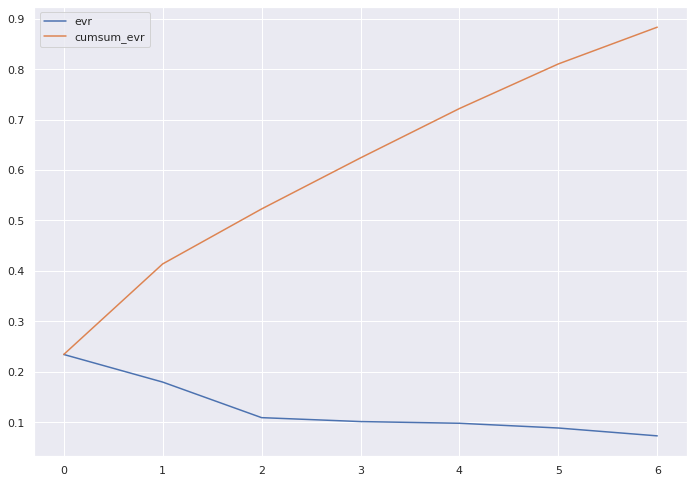

In [0]:
# Is 7 components really a good choice?
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [0]:
# How mach "information" do we kick out?
model.explained_variance_ratio_.sum()

0.8830309273683625

In [0]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=data_UML.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

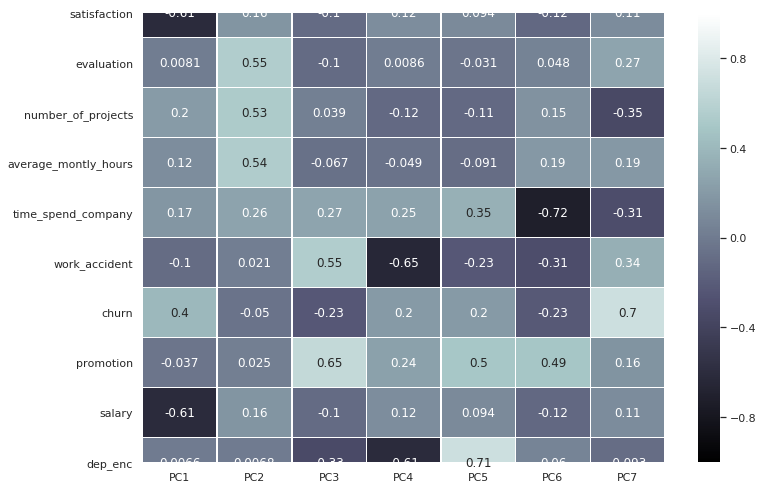

In [0]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

PC1 appears to be dominated by "Churn", "number of projects", "Time spend company", "average monthly hours". 

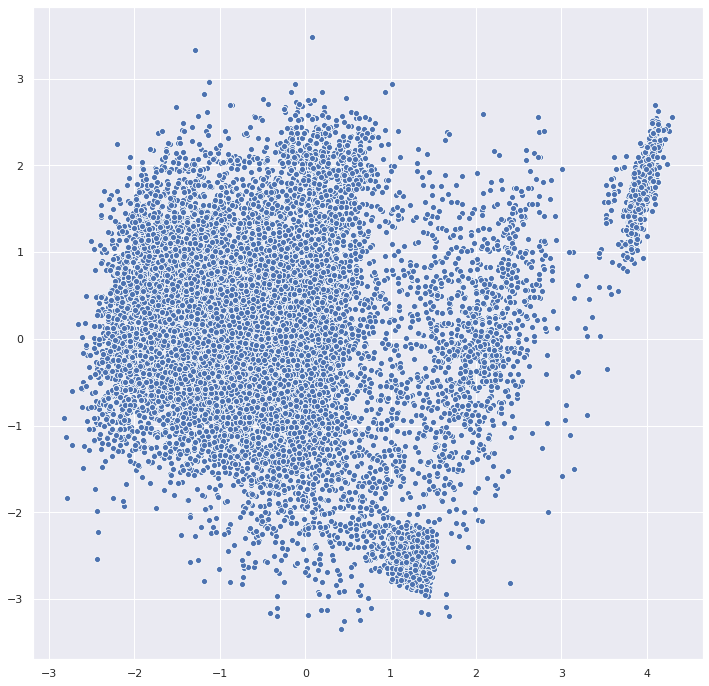

In [0]:
# Now we can plot in our points
plt.figure(figsize=(12,12))
g = sns.scatterplot(data_reduced[:,0], data_reduced[:,1],
                    legend='full', palette='viridis')

legend = g.get_legend()

# Supervised learning

In [0]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt

# Supervised learning

# Linear regression model

In [0]:
data = data_prep_1[:]

In [0]:
y = data.churn

In [0]:
data_1 = data.drop(['churn', 'satisfaction'], axis = 1)

In [0]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 8 columns):
evaluation              14999 non-null float64
number_of_projects      14999 non-null int64
average_montly_hours    14999 non-null int64
time_spend_company      14999 non-null int64
work_accident           14999 non-null int64
promotion               14999 non-null int64
salary                  14999 non-null float64
dep_enc                 14999 non-null int64
dtypes: float64(2), int64(6)
memory usage: 937.6 KB


In [0]:
X = data_1.loc[:,'evaluation':'dep_enc']

In [0]:
# Load and instantiate a LabelEncoder that will turn our text labels (regions into indices)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [0]:
# Transform labels into indices by passing y to the encoder
y_enc = encoder.fit_transform(y)

In [0]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
# Apply the scaler to our X-features
X_scaled = scaler.fit_transform(X)

In [0]:
# Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

## Training and evaluating various models

In [0]:
# Import modules that we are going to use for all models

# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluatoion of performance
from sklearn.metrics import classification_report

# Assign model structure


In [0]:
# Import and instantiate the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

[0.19730687 0.20853434 0.18352483 0.20472171 0.19261253]
0.17571315785420583


## Plot scatter plot of data

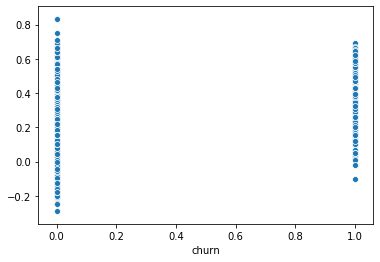

In [0]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

sns.scatterplot(y_test,y_pred)

# Assign model structure: LOGIT on churn


In [0]:
# Import and instantiate the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

[0.76541667 0.77458333 0.76       0.77333333 0.76406836]
0.7563333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

## Extract results data for presentation

In [0]:
# Performance evaluation using the classification_report

Y_value = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred)) #Print out the report

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2294
           1       0.46      0.23      0.30       706

    accuracy                           0.76      3000
   macro avg       0.63      0.57      0.58      3000
weighted avg       0.72      0.76      0.72      3000



## Prepare for plotting

In [0]:
# For that we need to install an updated version of the MLxtend library (it will make plotting of the confusion matrix easy)
!pip install -qq -U mlxtend

     |████████████████████████████████| 1.3MB 9.7MB/s 


In [0]:
# Import the confusion matrix plotter module
from mlxtend.plotting import plot_confusion_matrix

# We will also import sklearns confusion matrix module that will make it easy to produce a confusion matrix
# It's actually just a cross-tab of predicted vs. real values
from sklearn.metrics import confusion_matrix

## Plot confusion matrix

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7c729e56a0>)

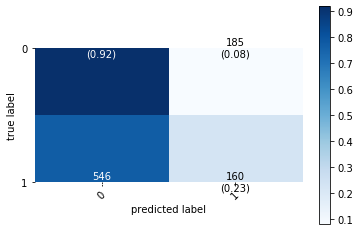

In [0]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                hide_spines = True,
                                class_names = Y_value)

# Assign model structure: Random Forest


In [0]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

[0.98833333 0.98708333 0.98708333 0.99       0.98916215]
0.9863333333333333


## Extract results data for presentation

In [0]:
# Performance evaluation using the classification_report

Y_value = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred)) #Print out the report

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2294
           1       0.99      0.95      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.97      0.98      3000
weighted avg       0.99      0.99      0.99      3000



## Plot confusion matrix

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7c72964080>)

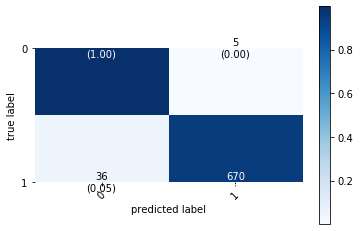

In [0]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                hide_spines = True,
                                class_names = Y_value)

## Assign model structure: XGB regressor

In [0]:
# Import and instantiate a XGBoost Regressor

model = xgb.XGBRegressor()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is not accacy but a R^2
print(model.score(X_test, y_test))

NameError: ignored

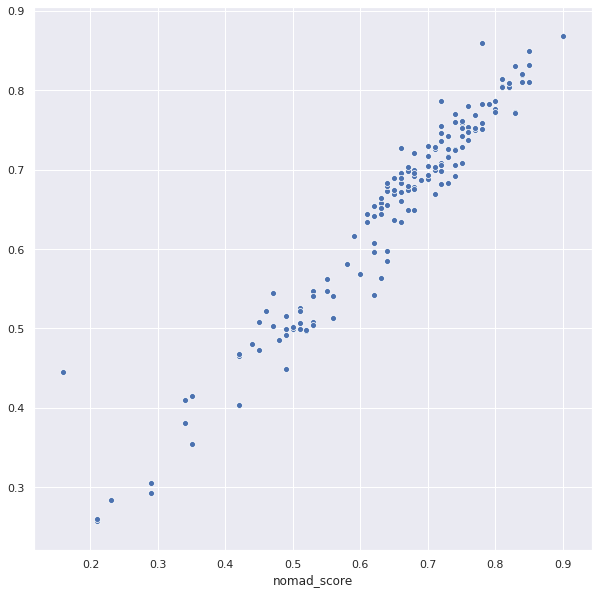

In [0]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

sns.scatterplot(y_test,y_pred)

In [0]:
data_test['nomad_score_pred'] = y_pred

alt.Chart(data_test).mark_circle(size=60).encode(
    x='nomad_score',
    y='nomad_score_pred',
    color=alt.Color('region', scale=alt.Scale(scheme='category10')),
    tooltip=['region','weed','place']
).interactive()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


alt.Chart(...)